In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
#from keras import backend as K

2023-11-28 16:00:34.549353: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-28 16:00:34.551677: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 16:00:34.579989: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 16:00:34.580584: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-28 16:00:35.276579: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
from utils import load_data, calc_confusion_metrics_per_col

data = load_data(
    "data/java_comp_maintenance"
)
failure_model = tf.keras.models.load_model(
    "experiments/java_comp_maintenance_v2_3x0/20231120-142207/checkpoint", 
    compile=False,
)
thresholds = np.load(
    "experiments/java_comp_maintenance_v2_3x0/20231120-142207/thresholds.npy"
)

Y_pred = failure_model.predict(data["X_test"].values)
Y_class_pred = (Y_pred > thresholds) * 1
conf_df = calc_confusion_metrics_per_col(data["Y_test"], Y_class_pred)

indices = []
for cont in data["Y_test"].columns:
    indices.append(int(cont.split("_")[-1]))

true_neg = (conf_df["true_neg"] * 100).round()
true_pos = (conf_df["true_pos"] * 100).round()

2023-11-28 16:03:48.525162: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-11-28 16:03:48.525202: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: gm0winl649.bureau.si.interne
2023-11-28 16:03:48.525205: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: gm0winl649.bureau.si.interne
2023-11-28 16:03:48.525327: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 520.56.6
2023-11-28 16:03:48.525431: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  520.56.06  Release Build  (dvs-builder@U16-T12-10-2)  Thu Oct  6 21:33:54 UTC 2022
GCC version:  gc

982/982 [==============================] - 3s 3ms/step


numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



LINE IDS
SURVIVAL RATE DATA
TRUE POSITIVE PRED
TRUE NEGATIVE PRED


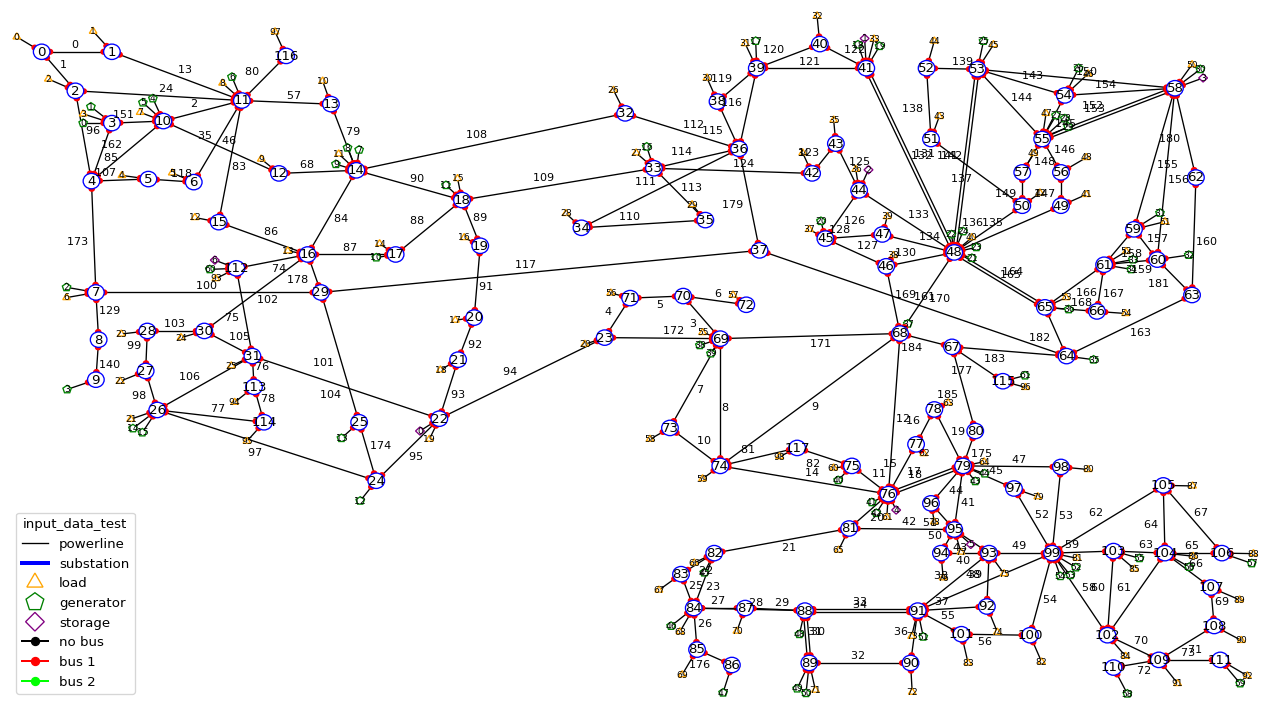

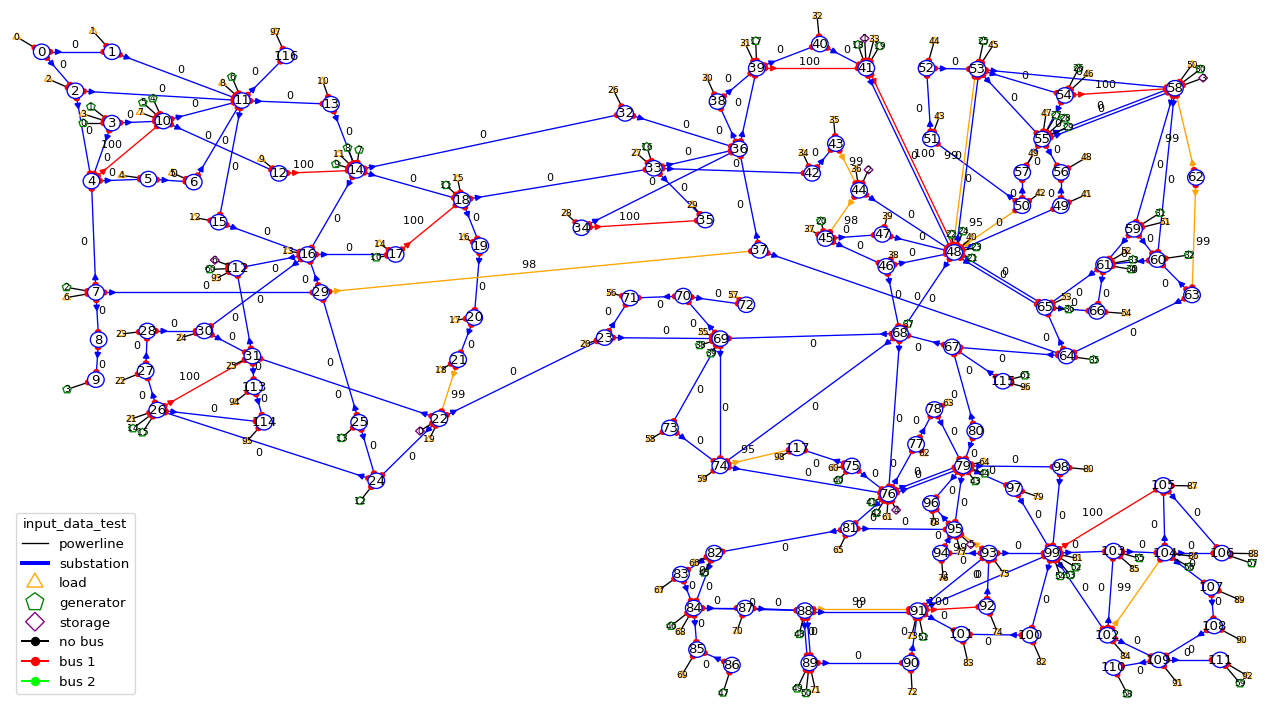

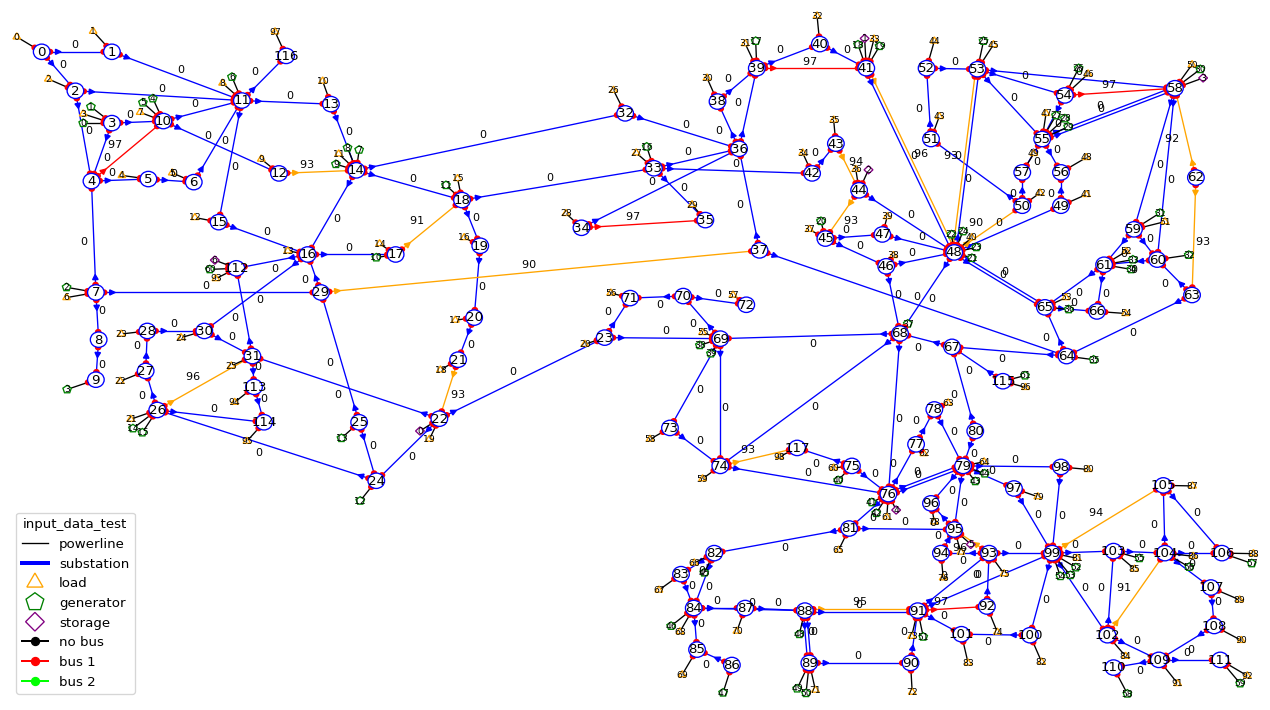

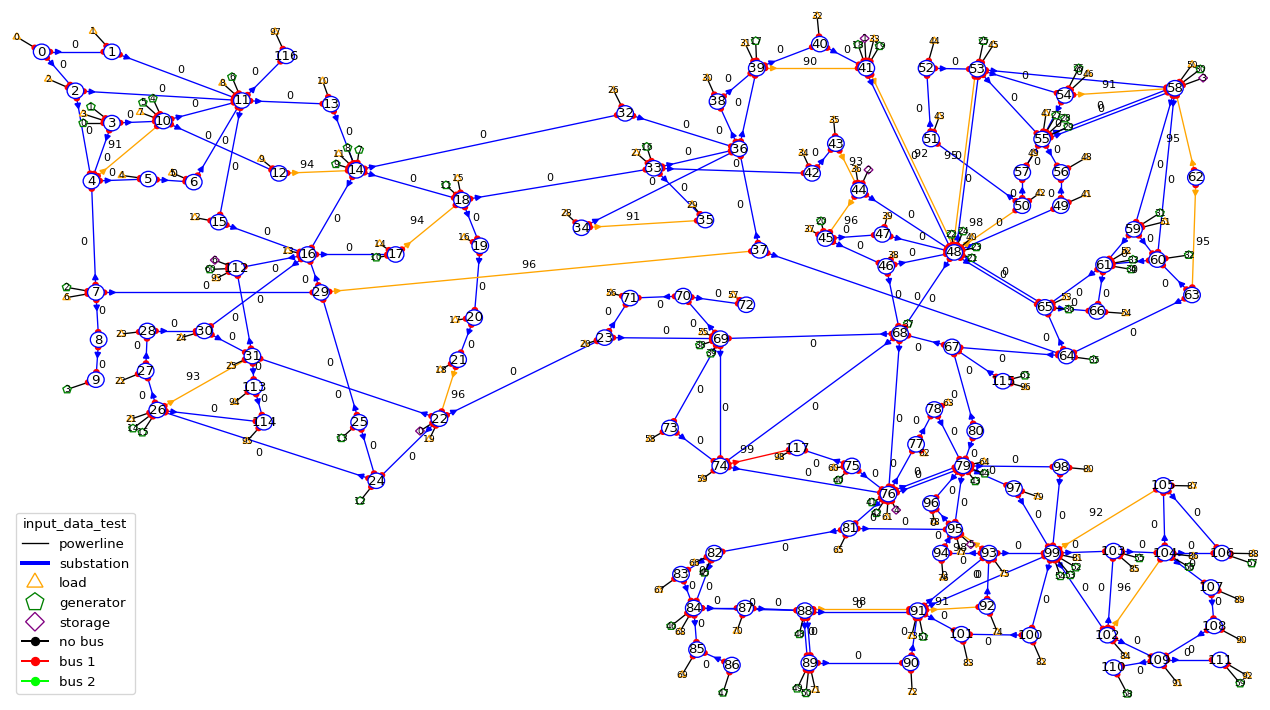

In [6]:
# do the visualization thing
import grid2op
from grid2op.PlotGrid import PlotMatplot

env = grid2op.make("input_data_test")
Y = pd.concat([data["Y_train"], data["Y_test"]], axis=0)

plot_helper = PlotMatplot(env.observation_space)
#plot_helper.figure # use this to set font size if possible

line_ids = [int(i) for i in range(env.n_line)]
#fig_layout = plot_helper.plot_layout()
#fig_info = plot_helper.plot_info(line_values=env.get_thermal_limit())
# print names of the lines using line_ids
print("LINE IDS")
fig_info = plot_helper.plot_info(line_values=line_ids)

# Mark alertable lines (should be the same as the contingencies)
#line_color = np.zeros(env.n_line)
#line_color[env.alertable_line_ids]=1
#plot_helper.plot_info(line_values=line_color, coloring="line")

# Plot failure rate on contingencies:
print("SURVIVAL RATE DATA")
survival_rate = round(Y.sum(axis=0) / len(Y) * 100)
line_survival_rate = np.array([0 for i in range(env.n_line)])
line_survival_rate[indices] = survival_rate.values
fig_info = plot_helper.plot_info(line_values=line_survival_rate, coloring="line")

print("TRUE POSITIVE PRED")
# true pos model prediction per cont
true_pos_lines = np.array([0 for i in range(env.n_line)])
true_pos_lines[indices] = true_pos.values
fig_info = plot_helper.plot_info(line_values=true_pos_lines, coloring="line")

print("TRUE NEGATIVE PRED")
# true negative model prediction per cont
true_neg_lines = np.array([0 for i in range(env.n_line)])
true_neg_lines[indices] = true_neg.values
fig_info = plot_helper.plot_info(line_values=true_neg_lines, coloring="line")